# E01 - Simple Linear Regression

### Problem Statement:

Suppose you are the CEO of a restaurant franchise and are considering different cities for
opening a new outlet. The chain already has trucks in various cities and you have data for profits
and populations from the cities. You would like to use this data to help you select which city to
expand to next. The file ex1data1.txt contains the dataset for linear regression problem. The first
column is the population of a city and the second column is the profit of a food truck in that city.
A negative value for profit indicates a loss. Make the predictions on profits in areas of 35000 and
70,000 people.

In short we are going to predict __profit for given population__ .

Dependent variable :- ___profit___ .

Independent variable :- ___population__


In [1]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Loading data
df = pd.read_csv("ex31.txt", names = ["Population","Profit"])
X = df["Population"]
y = df["Profit"]
df.describe()

Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000

In [3]:
df.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

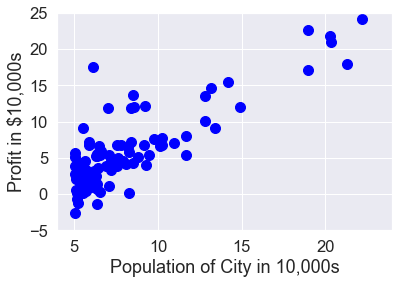

In [4]:
# Plotting using Seaborn

# Font size for legends(axis)
sns.set(font_scale = 1.5)

# fit_reg - Fits line
# scatter_kws : style for points alpha gives opacity
# line_kws : style for line

sns.regplot('Population','Profit',data=df,fit_reg=False, marker="o",
            scatter_kws={"color":"blue","alpha":1,"s":100},
           line_kws={"color":"red","alpha":0.5}) # Set marker style
                        
plt.xlabel("Population of City in 10,000s"); 
plt.ylabel("Profit in $10,000s");
plt.xlim(4,24);
plt.ylim(-5,25);

In [5]:
theta = np.zeros((2,),dtype="float64")
alpha = 0.01 #Step size
iterations = 15000 #No. of iterations
m = y.size #No. of data points

In [6]:
# Cost function
def cost(X, y, theta , m):
    j = 0
    for i in range(m):
        j = j + ( (theta[0] + theta[1]*X[i]) - y[i])**2
    j = (1/(2*m))*j
    return j       

In [7]:
# Gardient descent
def gradient_descent(X, y, theta, iterations, alpha, m):
    past_cost = []
    past_thetas = []
   
    for i in range(iterations):
        past_cost.append( cost(X, y, theta, m))
        
        tmp1 = tmp2 = 0
        for j in range(m):
            tmp1 = tmp1 + ( (theta[0] + theta[1]*X[j]) - y[j]) 
            tmp2 = tmp2 + (((theta[0] + theta[1]*X[j]) - y[j])*X[j])
            
        t0 = theta[0] - (alpha/m) * tmp1;
        t1 = theta[1] - (alpha/m) * tmp2;
        theta[0] = t0;
        theta[1] = t1;
#         print(theta)
        past_thetas.append(list(theta))
#         print(past_thetas)
    
    return past_thetas, past_cost

In [8]:
Initial_cost = cost(X, y, theta , m)
print("Initial cost before running Gradient Descent is:- %f"%Initial_cost)

Initial cost before running Gradient Descent is:- 32.072734


In [9]:
past_thetas, past_costs = gradient_descent(X, y, theta, iterations, alpha, m)

In [10]:
past_thetas[0][1]

0.6532884974555674

In [11]:
print("Cost after Gradient Descent:- %f" %past_costs[-1])
print("Thetas returned after Gradient Descent:-",past_thetas[-1])


Cost after Gradient Descent:- 4.476971
Thetas returned after Gradient Descent:- [-3.895780878304843, 1.1930336441888894]


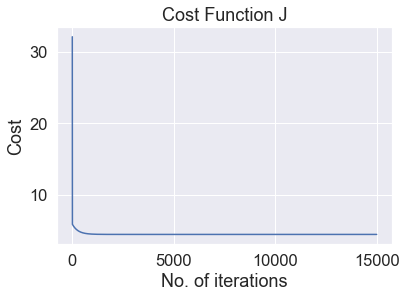

In [12]:
# Cost v/s Iterations
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

plt.plot(past_costs)
plt.show()

In [13]:
# Predicting values
theta = past_thetas[-1]
print("Profit for population of 35000 is:- %f" %( (theta[0]+3.5*theta[1])*10000) )
print("Profit for population of 70000 is:- %f" %( (theta[0]+7*theta[1])*10000) )

Profit for population of 35000 is:- 2798.368764
Profit for population of 70000 is:- 44554.546310


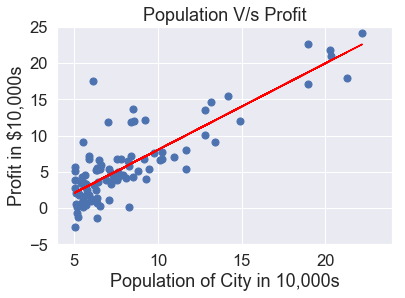

In [14]:
# visualizing result
sns.set(font_scale = 1.5)
plt.scatter(X,y,s=50);
plt.plot(X,theta[0]+theta[1]*X,color="red")
plt.title("Population V/s Profit")
plt.xlabel("Population of City in 10,000s"); 
plt.ylabel("Profit in $10,000s");
plt.xlim(4,24);
plt.ylim(-5,25);

In [15]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes()
fig.set_tight_layout(True)

plt.title("Population V/s Profit")
plt.xlabel("Population of City in 10,000s"); 
plt.ylabel("Profit in $10,000s");
plt.xlim(4,24);
plt.ylim(-5,25);


# Plot a scatter that persists (isn't redrawn) and the initial line.
plt.scatter(X, y,color="red")
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation,

def animate(i):
    x = np.linspace(0, 25, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_xdata(x)
    line.set_ydata(y)
    annotation.set_text('Cost = %.2f' % (past_costs[i]))
    return line, annotation,

anim = FuncAnimation(fig, animate, init_func=init, frames=400, interval=0, blit=True)
anim.save('animation.gif', writer='imagemagick',fps=20)


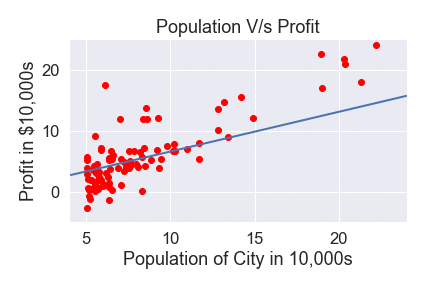

In [16]:
# Display the animation...

from IPython.display import Image
with open('animation.gif','rb') as file:
    display(Image(file.read()))